In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top50spotify2019/top50.csv


In [29]:
spotify = pd.read_csv('/kaggle/input/top50spotify2019/top50.csv', encoding='latin-1')
spotify.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [30]:
spotify=spotify.drop(spotify.iloc[:,0:1],axis=1)
spotify.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [31]:
spotify.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [32]:
spo=spotify.set_index(['Track.Name','Artist.Name'])
spo.head()

,,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Track.Name,Artist.Name,,,,,,,,,,,
Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


SONGS WITH MORE POPULARITY AT SPOTIFY

In [33]:
spo['Popularity'].nlargest(3)

Track.Name                   Artist.Name  
bad guy                      Billie Eilish    95
Goodbyes (Feat. Young Thug)  Post Malone      94
Callaita                     Bad Bunny        93
Name: Popularity, dtype: int64

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Comparing Beats with Energy')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0, flags=flags)


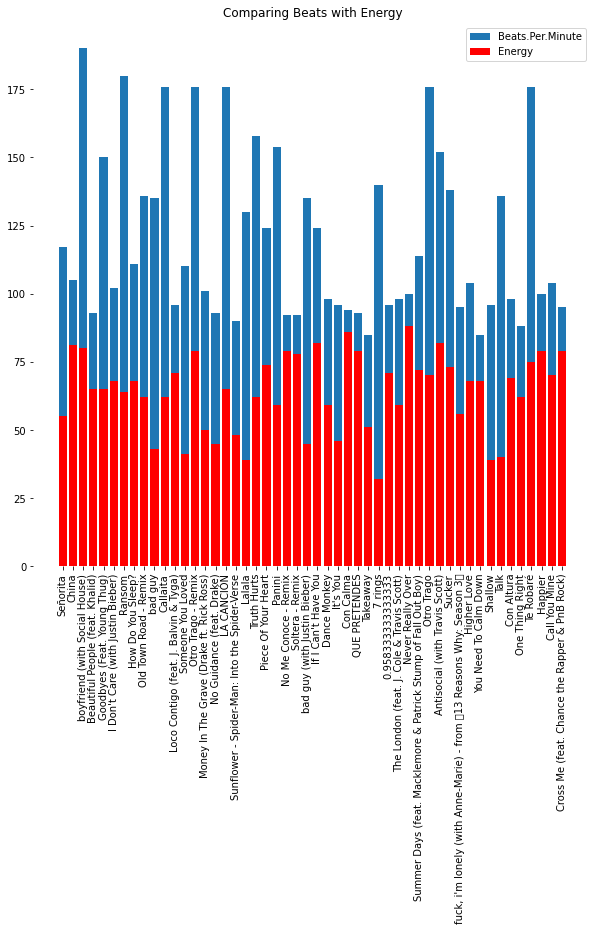

In [35]:
plt.figure(figsize=(10,10))
track=spotify['Track.Name']
genre=spotify['Energy']
beats=spotify['Beats.Per.Minute']
popularity=spotify['Popularity']
plt.bar(track,beats,linewidth=2)
plt.bar(track,genre,linewidth=2,color='red')
ax=plt.gca()
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(90)
plt.legend(['Beats.Per.Minute','Energy'],loc='best')
plt.box(on=None)
plt.title('Comparing Beats with Energy')

Text(0.5, 1.0, 'Comparing Beats with Energy')

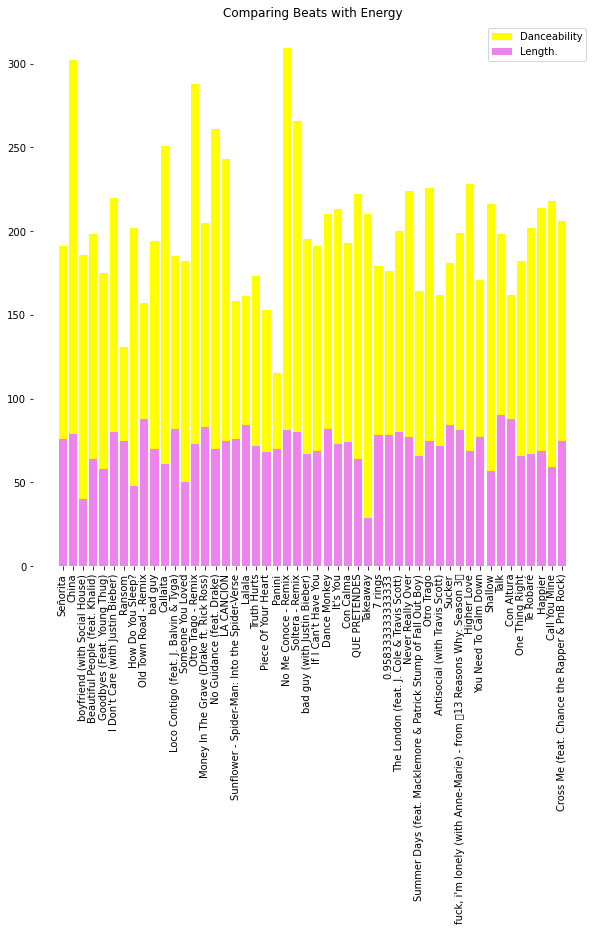

In [36]:
plt.figure(figsize=(10,10))
dance=spotify['Danceability']
length=spotify['Length.']

plt.bar(track,length,linewidth=2,color='yellow')
plt.bar(track,dance,linewidth=2,color='violet')
ax=plt.gca()
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(90)
plt.legend(['Danceability','Length.'],loc='best')
plt.box(on=None)
plt.title('Comparing Beats with Energy')

Text(0.5, 1.0, 'Comparing Speechiness and Acousticness')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0, flags=flags)


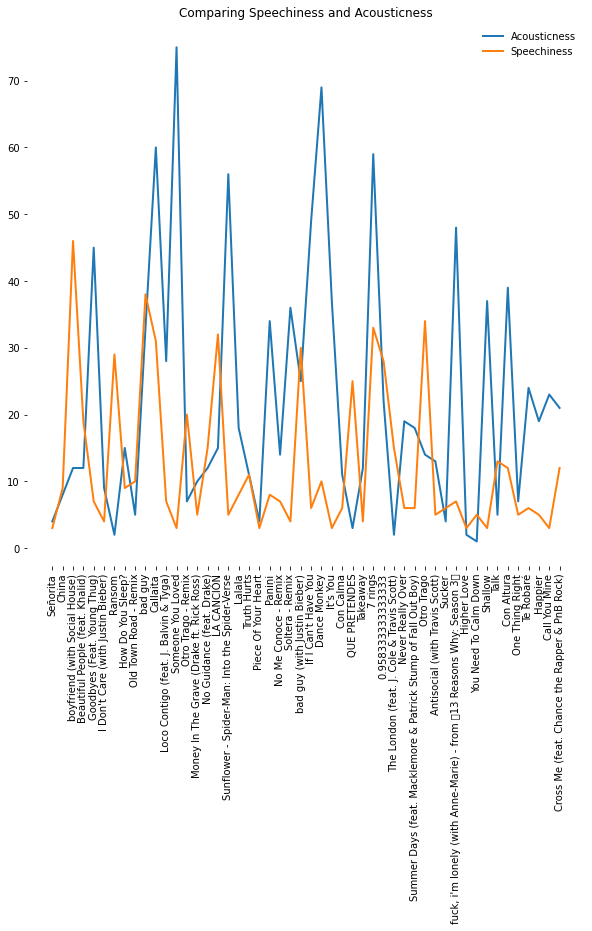

In [37]:
plt.figure(figsize=(10,10))
acoust=spotify['Acousticness..']
speech=spotify['Speechiness.']
plt.plot(track,acoust,linewidth=2)
plt.plot(track,speech,linewidth=2)
ax=plt.gca()
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(90)
plt.box(on=None)
plt.legend(['Acousticness','Speechiness'],loc='best',frameon=False)
plt.title('Comparing Speechiness and Acousticness')

Text(0.5, 1.0, 'Comparing Loudness, Liveness and Valence')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0, flags=flags)


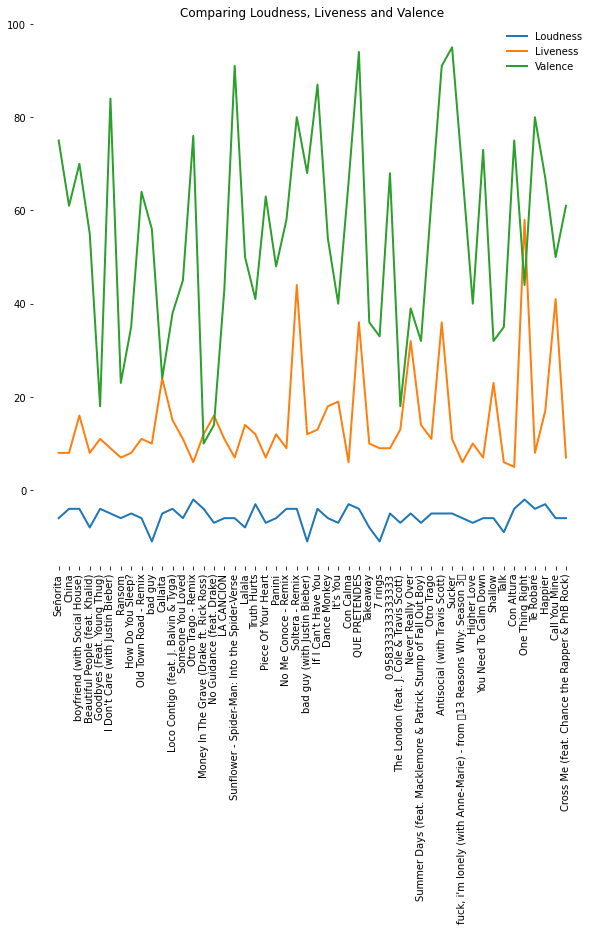

In [38]:
plt.figure(figsize=(10,10))
loud=spotify['Loudness..dB..']
live=spotify['Liveness']
valence=spotify['Valence.']
plt.plot(track,loud,linewidth=2)
plt.plot(track,live,linewidth=2)
plt.plot(track,valence,linewidth=2)
ax=plt.gca()
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(90)
plt.box(on=None)
plt.legend(['Loudness','Liveness','Valence'],loc='best',frameon=False)
plt.title('Comparing Loudness, Liveness and Valence')

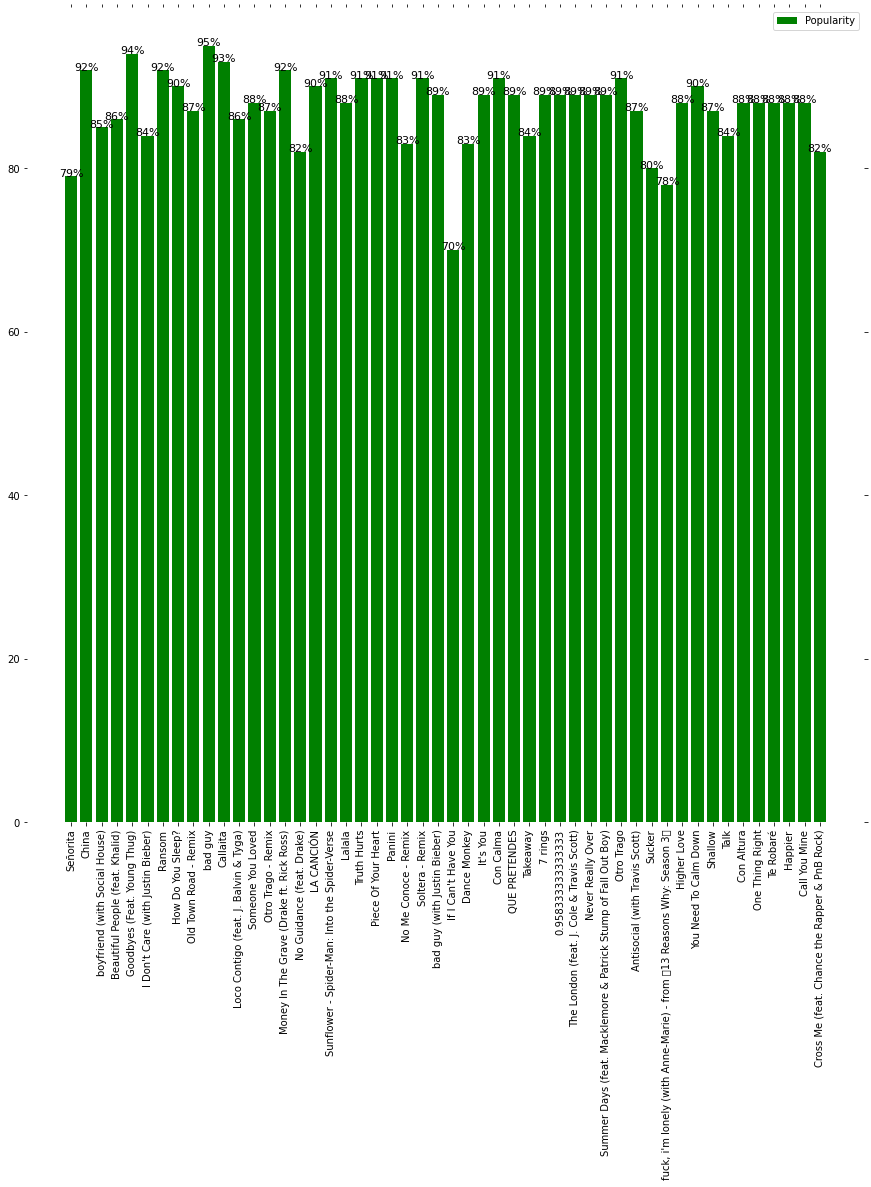

In [39]:
plt.figure(figsize=(15,15))
bars=plt.bar(track,popularity,linewidth=22,color='green')
ax=plt.gca()
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(90)
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),str(int(bar.get_height()))+'%',ha='center',color='black',fontsize=11)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.legend(['Popularity'],loc='best')
plt.box(on=None)